PROJECT 5
# *Project Title* - Manufacturing Quality Control with Control Charts

Problem
A factory tracks defect rates on an assembly line and needs to detect shifts in quality.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Simulate 60 days of defect data
np.random.seed(42)
days = pd.date_range(start='2024-01-01', periods=60)
sample_size = np.random.randint(80, 120, size=60)  # daily sample sizes
true_defect_rate = 0.05

#Simulate dialy defect counts
defect_count = np.random.binomial(sample_size, true_defect_rate)

df = pd.DataFrame({
    'Date': days,
    'Sample_Size': sample_size,
    'Defects': defect_count
})

df['Defect_Rate'] = df['Defects'] / df['Sample_Size']
print(df.head())

        Date  Sample_Size  Defects  Defect_Rate
0 2024-01-01          118        5     0.042373
1 2024-01-02          108        9     0.083333
2 2024-01-03           94        6     0.063830
3 2024-01-04           87        3     0.034483
4 2024-01-05          100        5     0.050000


In [ ]:
df

,Date,Sample_Size,Defects,Defect_Rate
0,2024-01-01,118,5,0.042373
1,2024-01-02,108,9,0.083333
2,2024-01-03,94,6,0.063830
3,2024-01-04,87,3,0.034483
4,2024-01-05,100,5,0.050000
5,2024-01-06,118,6,0.050847
6,2024-01-07,98,9,0.091837
7,2024-01-08,102,7,0.068627
8,2024-01-09,90,6,0.066667
9,2024-01-10,90,5,0.055556


In [ ]:
# Overall average defect rate (p̄)
p_bar = df['Defects'].sum() / df['Sample_Size'].sum()

# Control limits (3σ)
df['p_bar'] = p_bar
df['UCL'] = p_bar + 3 * np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])
df['LCL'] = p_bar - 3 * np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])
df['LCL'] = df['LCL'].clip(lower=0)  # LCL can't be negative

This code plots:

The daily defect rate

The upper and lower control limits (UCL, LCL)

The center line (p̄)

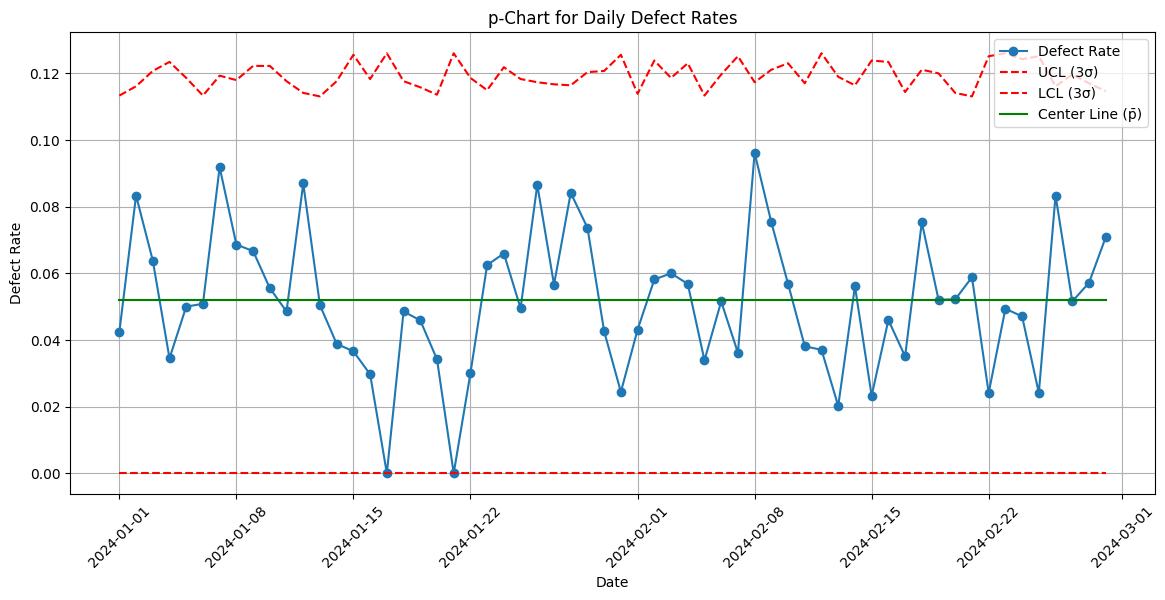

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['Date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')
plt.title('p-Chart for Daily Defect Rates')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
# plt.tight_

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
df['Out_of_Control'] = (df['Defect_Rate'] > df['UCL']) | (df['Defect_Rate'] < df['LCL'])

# Show flagged days
print(df[df['Out_of_Control']][['Date', 'Defect_Rate', 'UCL', 'LCL']])

Empty DataFrame
Columns: [Date, Defect_Rate, UCL, LCL]
Index: []


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Test if last day's defect rate is significantly higher than average
last = df.iloc[-1]
count = last['Defects']
nobs = last['Sample_Size']

stat, pval = proportions_ztest(count, nobs, value=p_bar, alternative='larger')
print(f"Z-stat: {stat:.2f}, p-value: {pval:.4f}")

if pval < 0.05:
    print("⚠ Statistically significant increase in defects!")
else:
    print("✅ No significant shift detected.")

Z-stat: 0.78, p-value: 0.2181
✅ No significant shift detected.


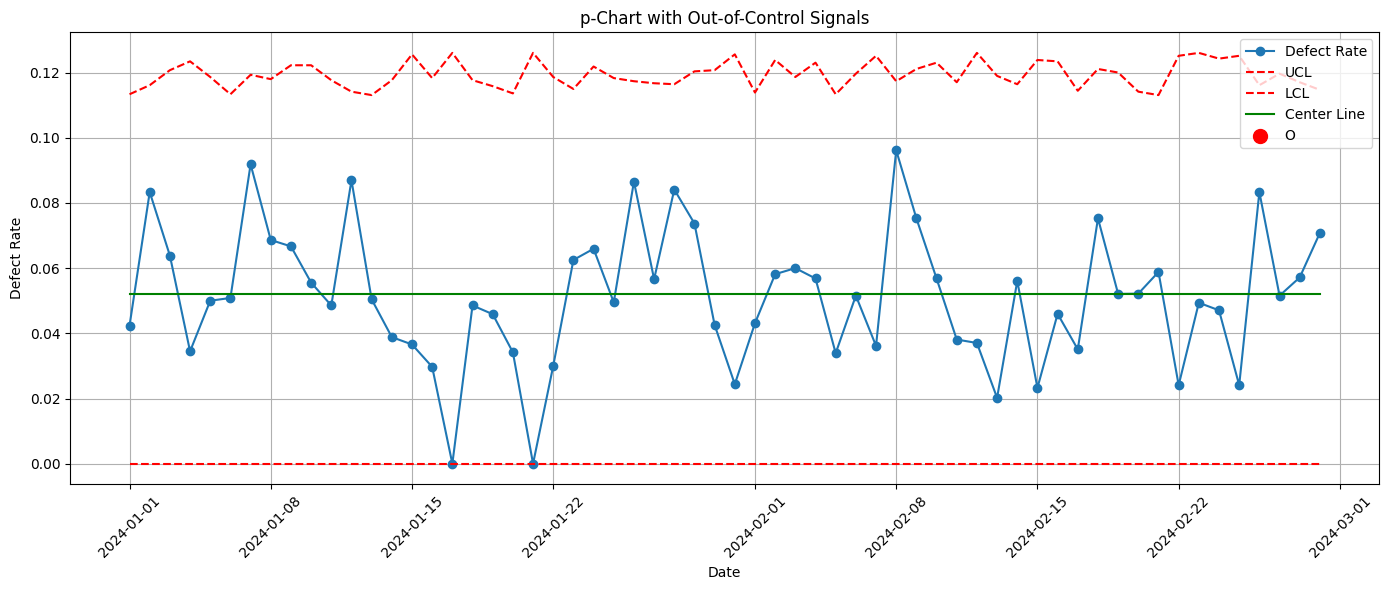

In [ ]:
# Mark out-of-control points on the chart
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL')
plt.plot(df['Date'], df['p_bar'], linestyle='-', color='green', label='Center Line')

# Highlight points
out = df[df['Out_of_Control']]
plt.scatter(out['Date'], out['Defect_Rate'], color='red', s=100, label='O')
plt.title('p-Chart with Out-of-Control Signals')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Introduce a shift in the defect rate on day 35
df.loc[35:, 'Defects'] = np.random.binomial(df.loc[35:, 'Sample_Size'], 0.10)  # doubled defect rate
df['Defect_Rate'] = df['Defects'] / df['Sample_Size']

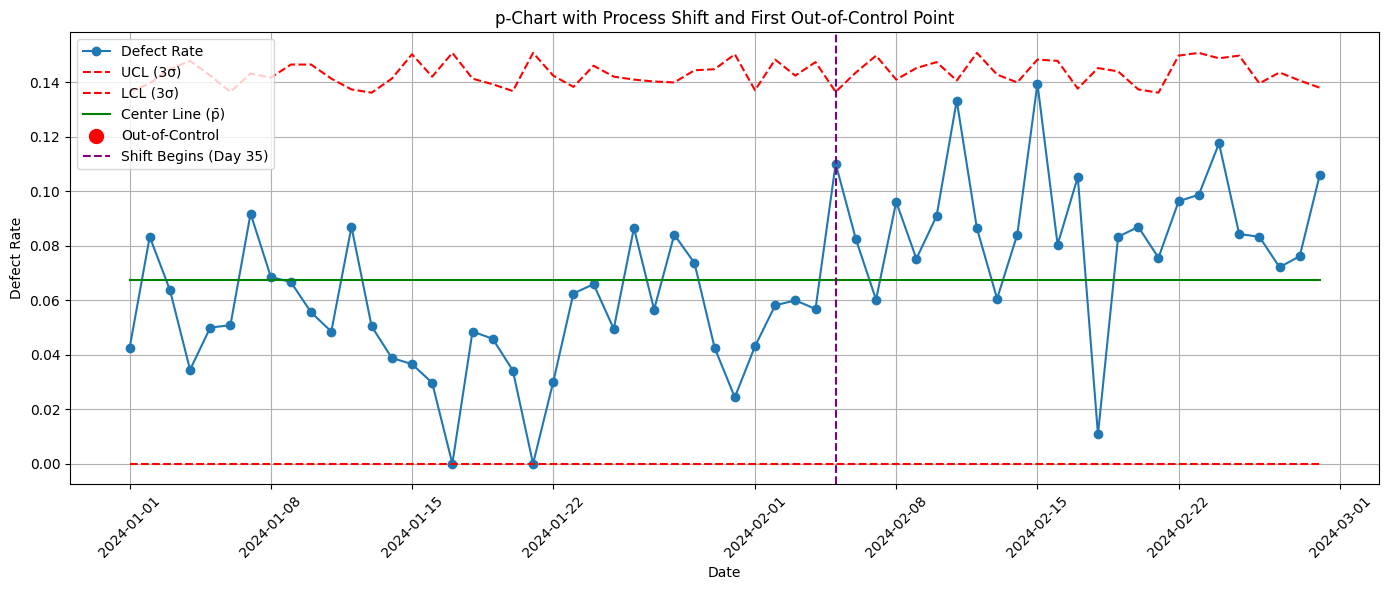

In [ ]:
import matplotlib.pyplot as plt

# Recalculate p̄ and control limits
p_bar = df['Defects'].sum() / df['Sample_Size'].sum()
df['p_bar'] = p_bar
df['UCL'] = p_bar + 3 * np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])
df['LCL'] = p_bar - 3 * np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])
df['LCL'] = df['LCL'].clip(lower=0)

# Flag out-of-control points
df['Out_of_Control'] = (df['Defect_Rate'] > df['UCL']) | (df['Defect_Rate'] < df['LCL'])
out_points = df[df['Out_of_Control']]

# Identify first out-of-control point AFTER the shift
first_shift_index = 35
first_out_after_shift = df.loc[first_shift_index:].query("Out_of_Control").head(1)

# Plot setup
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['Date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')
plt.scatter(out_points['Date'], out_points['Defect_Rate'], color='red', s=100, zorder=5, label='Out-of-Control')
plt.axvline(df['Date'].iloc[first_shift_index], color='purple', linestyle='--', label='Shift Begins (Day 35)')

# Add annotation to first out-of-control point after shift
if not first_out_after_shift.empty:
    x = first_out_after_shift['Date'].values[0]
    y = first_out_after_shift['Defect_Rate'].values[0]
    plt.annotate(
        '⚠ First out-of-control',
        xy=(x, y),
        xytext=(x, y + 0.02),
        arrowprops=dict(facecolor='black', shrink=0.05),
        fontsize=10,
        ha='center'
    )

# Labels and layout
plt.title('p-Chart with Process Shift and First Out-of-Control Point')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Here are a few commonly used run rules:

| Rule       | Description                                    | What it might mean               |
| ---------- | ---------------------------------------------- | -------------------------------- |
| Rule 1 | 1 point beyond 3σ                              | Obvious out-of-control condition |
| Rule 2 | 2 of 3 points beyond 2σ on the same side       | Moderate shift in process        |
| Rule 3 | 4 of 5 points beyond 1σ on same side           | Small shift developing           |
| Rule 4 | 8 points in a row on same side of center line  | Bias or trend present            |
| Rule 5 | 6 points in a row all increasing or decreasing | Upward or downward trend     |

In [ ]:
import numpy as np

# Step 1: Estimate standard deviation for each row
df['sigma'] = np.sqrt((df['p_bar'] * (1 - df['p_bar'])) / df['Sample_Size'])

# Step 2: Compute 1σ and 2σ boundaries
df['Upper_1sigma'] = df['p_bar'] + df['sigma']
df['Lower_1sigma'] = df['p_bar'] - df['sigma']
df['Upper_2sigma'] = df['p_bar'] + 2 * df['sigma']
df['Lower_2sigma'] = df['p_bar'] - 2 * df['sigma']

# -----------------------------------------
# RULE 1: One point beyond UCL or LCL
df['Rule1'] = (df['Defect_Rate'] > df['UCL']) | (df['Defect_Rate'] < df['LCL'])

# -----------------------------------------
# RULE 2: 2 of 3 consecutive points beyond 2σ (same side)
rule2_flags = [False] * len(df)
for i in range(2, len(df)):
    upper = (df.loc[i-2:i, 'Defect_Rate'] > df.loc[i-2:i, 'Upper_2sigma']).sum()
    lower = (df.loc[i-2:i, 'Defect_Rate'] < df.loc[i-2:i, 'Lower_2sigma']).sum()
    rule2_flags[i] = (upper >= 2) or (lower >= 2)
df['Rule2'] = rule2_flags

# -----------------------------------------
# RULE 4: 8 points in a row on same side of center line
df['Above_Center'] = df['Defect_Rate'] > df['p_bar']
run_lengths = [1]
for i in range(1, len(df)):
    if df.loc[i, 'Above_Center'] == df.loc[i - 1, 'Above_Center']:
        run_lengths.append(run_lengths[-1] + 1)
    else:
        run_lengths.append(1)
df['Run_Length'] = run_lengths
df['Rule4'] = df['Run_Length'] >= 8

# -----------------------------------------
# Combine rules
df['Any_Rule_Violation'] = df[['Rule1', 'Rule2', 'Rule4']].any(axis=1)

# View violations
violations = df[df['Any_Rule_Violation']]
print(violations[['Date', 'Defect_Rate', 'Rule1', 'Rule2', 'Rule4']])

         Date  Defect_Rate  Rule1  Rule2  Rule4
19 2024-01-20     0.034188  False  False   True
20 2024-01-21     0.000000  False  False   True
21 2024-01-22     0.030000  False  False   True
22 2024-01-23     0.062500  False  False   True
23 2024-01-24     0.065934  False  False   True
24 2024-01-25     0.049505  False  False   True
56 2024-02-26     0.083333  False  False   True
57 2024-02-27     0.072165  False  False   True
58 2024-02-28     0.076190  False  False   True
59 2024-02-29     0.106195  False  False   True


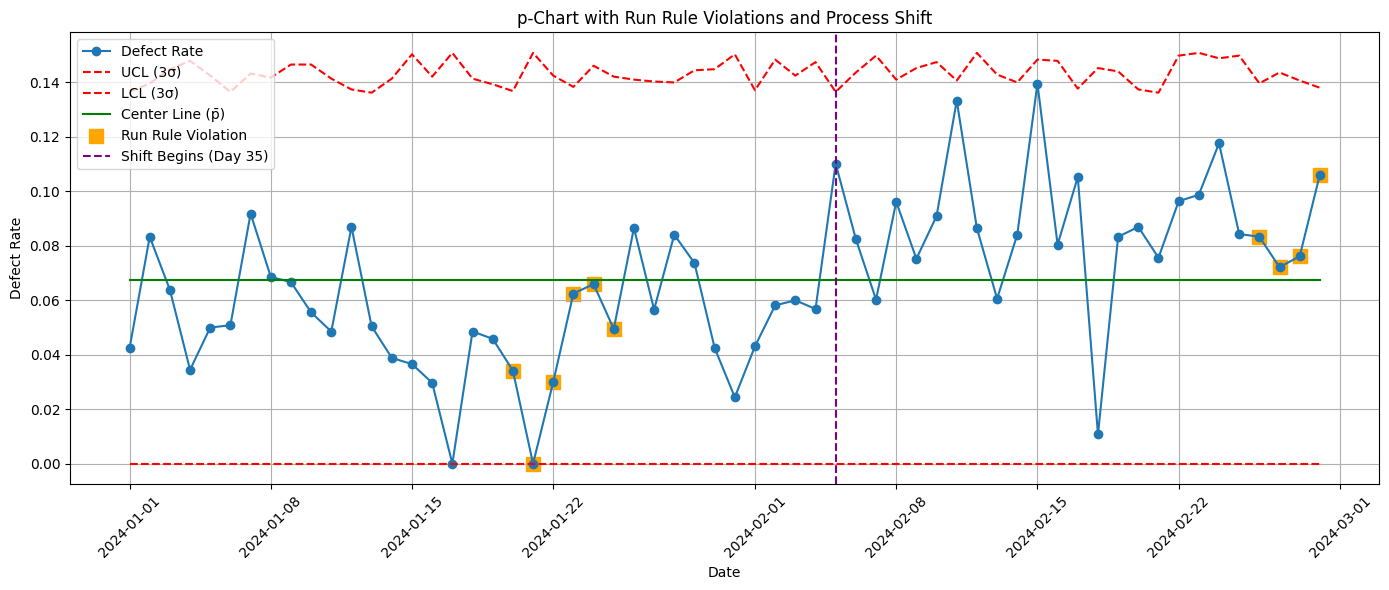

In [ ]:
# Plot with violations highlighted
plt.figure(figsize=(14, 6))

# Main defect rate line
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')

# Control limits and center
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['Date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')

# Highlight violations
plt.scatter(violations['Date'], violations['Defect_Rate'],
            color='orange', s=100, marker='s', label='Run Rule Violation')

# Add shift marker
plt.axvline(df['Date'].iloc[35], color='purple', linestyle='--', label='Shift Begins (Day 35)')

# Final touches
plt.title('p-Chart with Run Rule Violations and Process Shift')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

| Insight                           | Meaning                                                                   |
| --------------------------------- | ------------------------------------------------------------------------- |
| Orange squares before shift    | Early warning signals before visible failure                              |
| Orange squares after shift     | Process didn’t recover — it's now shifted or unstable                     |
| p-Chart + Run Rules             | Detect both **

In [ ]:
LSL = 0.00
USL = 0.08
mu = df['Defect_Rate'].mean()
sigma = df['Defect_Rate'].std()

Cp = (USL - LSL) / (6 * sigma)
Cpk = min((USL - mu) / (3 * sigma), (mu - LSL) / (3 * sigma))

print(f"Cp = {Cp:.2f}, Cpk = {Cpk:.2f}")

Cp = 0.46, Cpk = 0.15


Cp – Process Capability Index
Cpk – Process Capability Index (Centered)


In [ ]:
boot_means = [np.mean(np.random.choice(df['Defect_Rate'], size=len(df), replace=True)) for _ in range(1000)]
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

print(f"95% CI for average defect rate: ({ci_lower:.4f}, {ci_upper:.4f})")

95% CI for average defect rate: (0.0602, 0.0743)


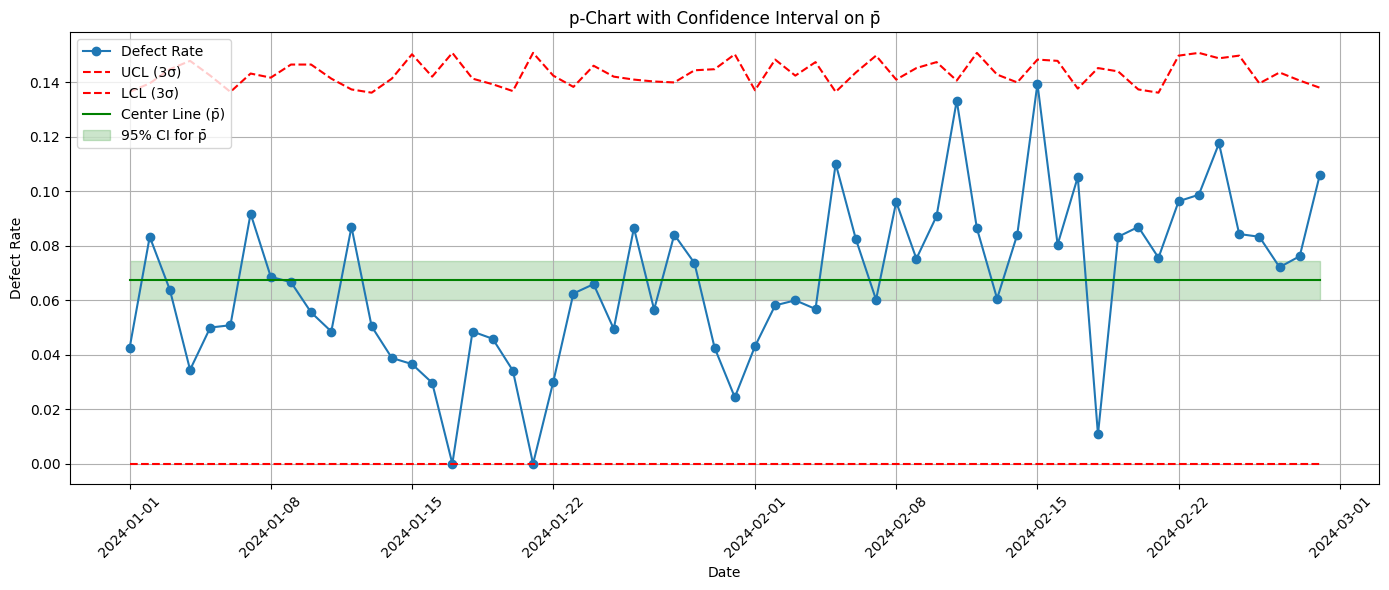

In [ ]:
# Existing chart
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['Date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')
# ⬇ Add this for confidence interval shading
plt.fill_between(
    df['Date'], ci_lower, ci_upper,
    color='green', alpha=0.2, label='95% CI for p̄'
)

# Finalize chart
plt.title('p-Chart with Confidence Interval on p̄')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

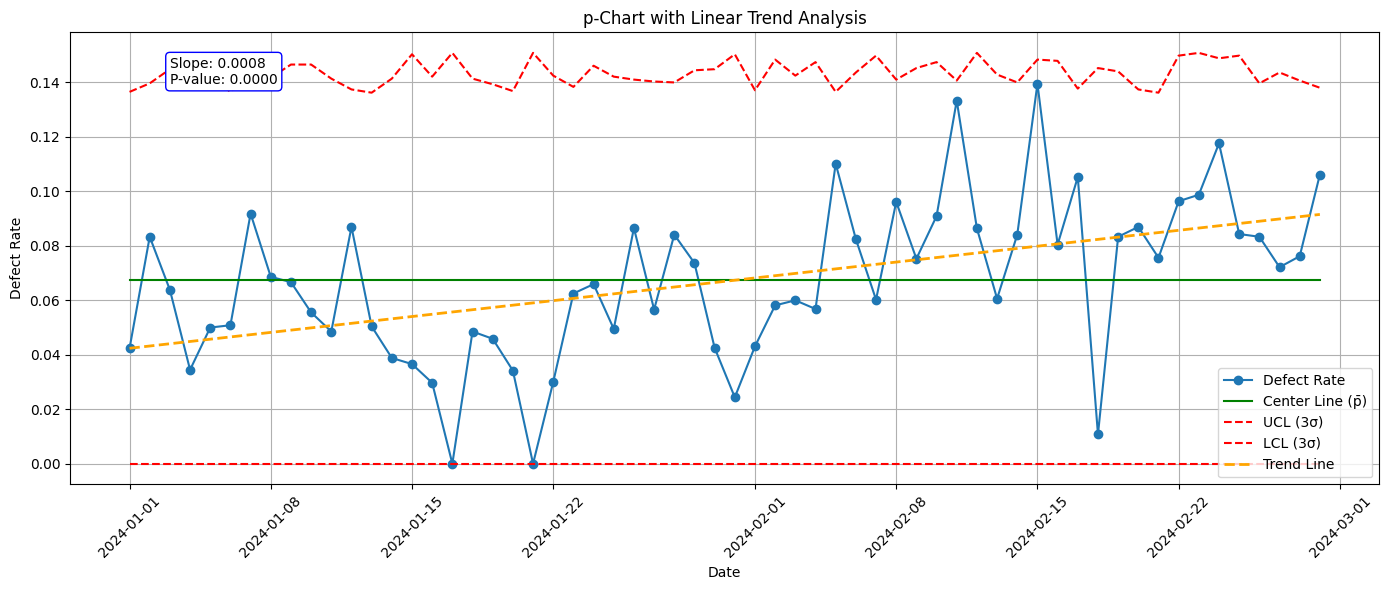

In [ ]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Step 1: Create a numeric "Day" column
df['Day'] = range(1, len(df) + 1)

# Step 2: Run linear regression on defect rate over time
trend_result = linregress(df['Day'], df['Defect_Rate'])

slope = trend_result.slope
p_value = trend_result.pvalue
intercept = trend_result.intercept
# Step 3: Create trend line values
df['Trend_Line'] = intercept + slope * df['Day']

# Step 4: Plot p-chart with trend line
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
# 🔹 Add trend line
plt.plot(df['Date'], df['Trend_Line'], linestyle='--', color='orange', linewidth=2, label='Trend Line')

# Step 5: Annotate with slope and p-value
plt.text(df['Date'].iloc[2], max(df['Defect_Rate']),
         f"Slope: {slope:.4f}\nP-value: {p_value:.4f}",
         fontsize=10, bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round'))
# Final touches
plt.title('p-Chart with Linear Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

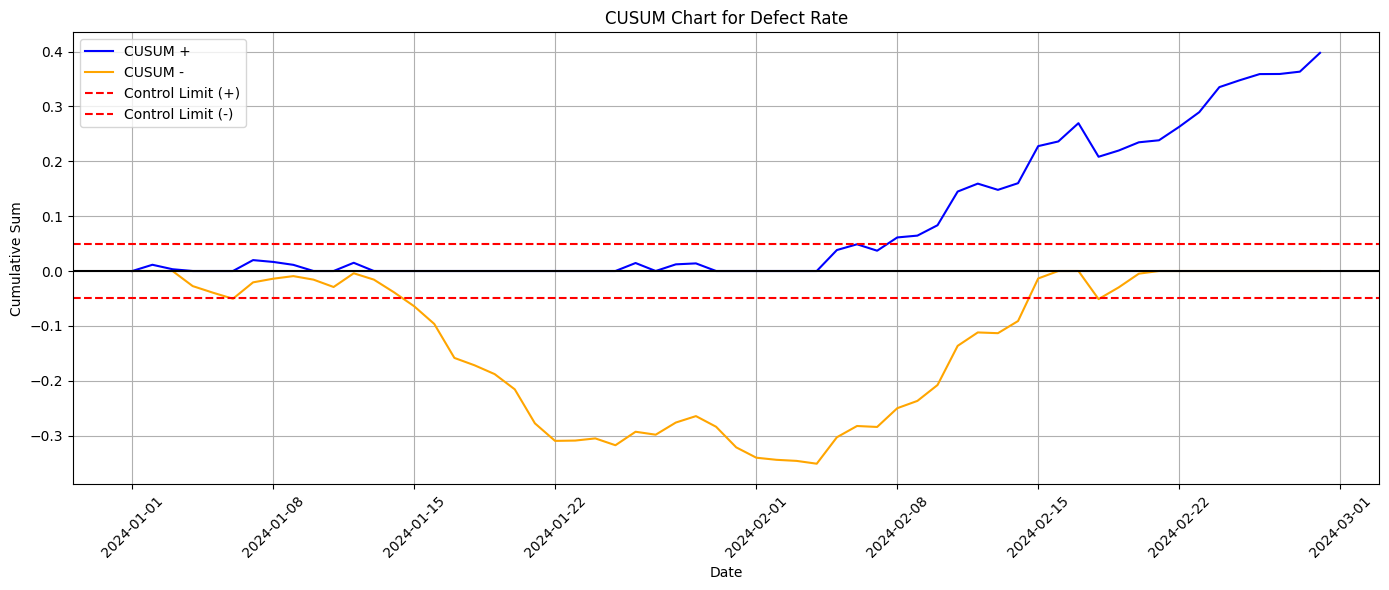

In [ ]:
# CUSUM parameters
target = df['Defect_Rate'].mean()  # p̄
k = 0.005  # Reference value (tuning sensitivity)
h = 0.05   # Decision threshold

# Initialize lists
cusum_pos = [0]
cusum_neg = [0]
# Calculate CUSUM values
for i in range(1, len(df)):
    p_i = df.loc[i, 'Defect_Rate']
    s_pos = max(0, cusum_pos[-1] + (p_i - target - k))
    s_neg = min(0, cusum_neg[-1] + (p_i - target + k))
    cusum_pos.append(s_pos)
    cusum_neg.append(s_neg)

# Add to DataFrame
df['CUSUM_Pos'] = cusum_pos
df['CUSUM_Neg'] = cusum_neg
# Plot CUSUM
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['CUSUM_Pos'], label='CUSUM +', color='blue')
plt.plot(df['Date'], df['CUSUM_Neg'], label='CUSUM -', color='orange')
plt.axhline(h, color='red', linestyle='--', label='Control Limit (+)')
plt.axhline(-h, color='red', linestyle='--', label='Control Limit (-)')
plt.axhline(0, color='black', linestyle='-')
plt.title('CUSUM Chart for Defect Rate')
plt.xlabel('Date')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

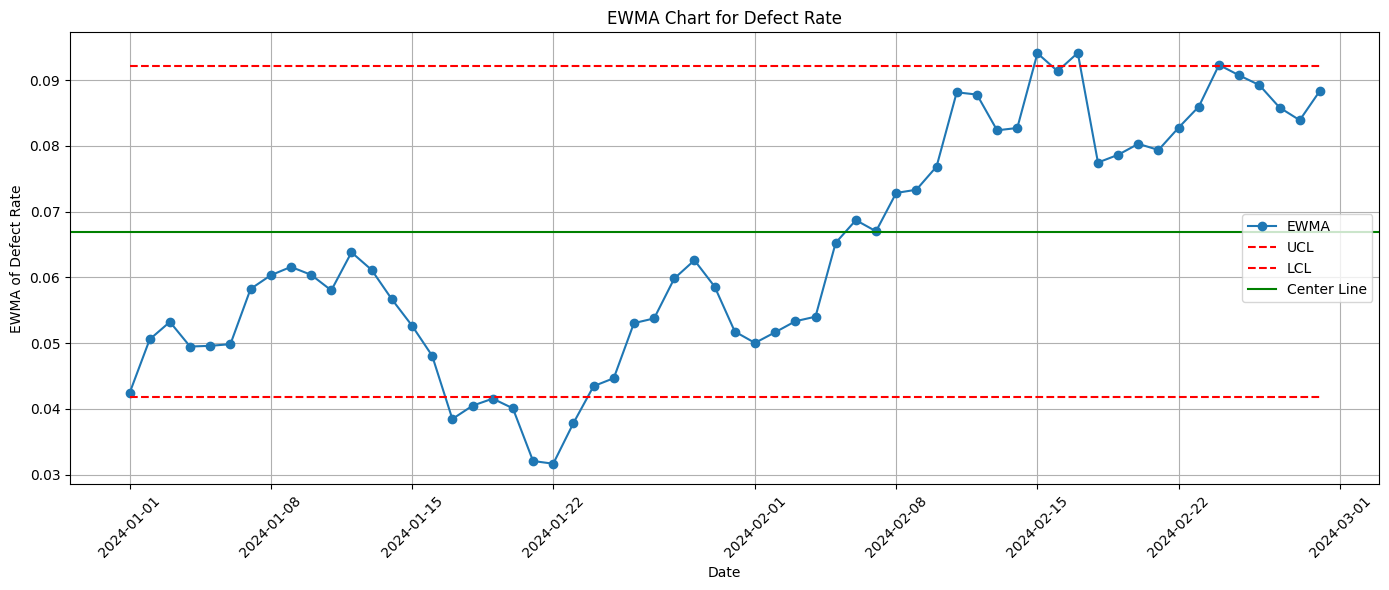

In [ ]:
# EWMA parameters
lambda_ = 0.2  # Smoothing constant (0.1–0.3 common)
L = 3  # Control limit multiplier

# Initialize EWMA
df['EWMA'] = 0.0
df.loc[0, 'EWMA'] = df.loc[0, 'Defect_Rate']

# Compute EWMA for each day
for i in range(1, len(df)):
    df.loc[i, 'EWMA'] = lambda_ * df.loc[i, 'Defect_Rate'] + (1 - lambda_) * df.loc[i - 1, 'EWMA']
# Estimate sigma (average over entire series)
p_bar = df['Defect_Rate'].mean()
avg_n = df['Sample_Size'].mean()
sigma = np.sqrt((p_bar * (1 - p_bar)) / avg_n)

# Control limits
df['UCL_EWMA'] = p_bar + L * sigma * np.sqrt(lambda_ / (2 - lambda_))
df['LCL_EWMA'] = p_bar - L * sigma * np.sqrt(lambda_ / (2 - lambda_))
# Plot EWMA
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['EWMA'], marker='o', label='EWMA')
plt.plot(df['Date'], df['UCL_EWMA'], linestyle='--', color='red', label='UCL')
plt.plot(df['Date'], df['LCL_EWMA'], linestyle='--', color='red', label='LCL')
plt.axhline(p_bar, color='green', linestyle='-', label='Center Line')
plt.title('EWMA Chart for Defect Rate')
plt.xlabel('Date')
plt.ylabel('EWMA of Defect Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-40-560716463.py:63: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-40-560716463.py:63: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-40-560716463.py:63: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202

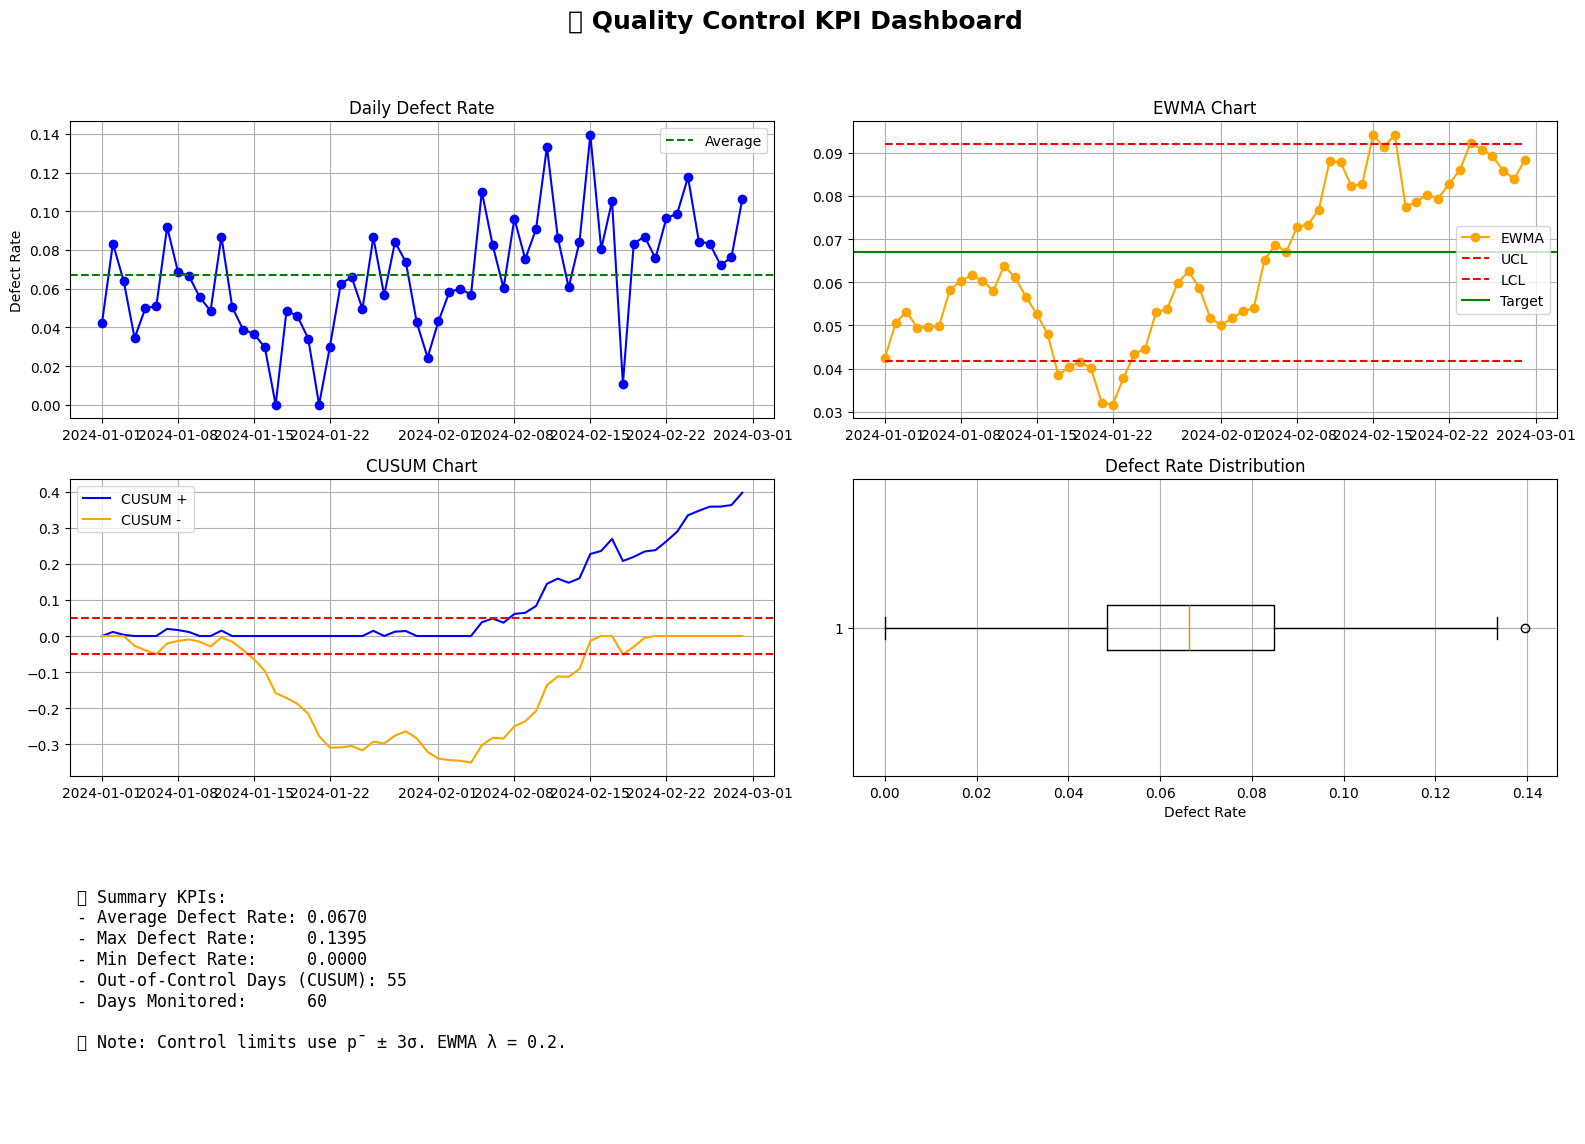

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Recalculate needed KPIs
avg_defect_rate = df['Defect_Rate'].mean()
max_defect_rate = df['Defect_Rate'].max()
min_defect_rate = df['Defect_Rate'].min()
out_of_control_days = (df['CUSUM_Pos'] > 0.05).sum() + (df['CUSUM_Neg'] < -0.05).sum()

# Create subplot grid
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('📊 Quality Control KPI Dashboard', fontsize=18, fontweight='bold')

# --- 1. Daily Defect Rate ---
axs[0, 0].plot(df['Date'], df['Defect_Rate'], marker='o', color='blue')
axs[0, 0].axhline(avg_defect_rate, color='green', linestyle='--', label='Average')
axs[0, 0].set_title('Daily Defect Rate')
axs[0, 0].set_ylabel('Defect Rate')
axs[0, 0].legend()
axs[0, 0].grid(True)

# --- 2. EWMA Chart ---
axs[0, 1].plot(df['Date'], df['EWMA'], marker='o', label='EWMA', color='orange')
axs[0, 1].plot(df['Date'], df['UCL_EWMA'], linestyle='--', color='red', label='UCL')
axs[0, 1].plot(df['Date'], df['LCL_EWMA'], linestyle='--', color='red', label='LCL')
axs[0, 1].axhline(avg_defect_rate, color='green', linestyle='-', label='Target')
axs[0, 1].set_title('EWMA Chart')
axs[0, 1].legend()
axs[0, 1].grid(True)

# --- 3. CUSUM Chart ---
axs[1, 0].plot(df['Date'], df['CUSUM_Pos'], label='CUSUM +', color='blue')
axs[1, 0].plot(df['Date'], df['CUSUM_Neg'], label='CUSUM -', color='orange')
axs[1, 0].axhline(0.05, color='red', linestyle='--')
axs[1, 0].axhline(-0.05, color='red', linestyle='--')
axs[1, 0].set_title('CUSUM Chart')
axs[1, 0].grid(True)
axs[1, 0].legend()

# --- 4. Boxplot of Defect Rates ---
axs[1, 1].boxplot(df['Defect_Rate'], vert=False)
axs[1, 1].set_title('Defect Rate Distribution')
axs[1, 1].set_xlabel('Defect Rate')
axs[1, 1].grid(True)

# --- 5. KPI Summary ---
axs[2, 0].axis('off')
kpi_text = f"""
📌 Summary KPIs:
- Average Defect Rate: {avg_defect_rate:.4f}
- Max Defect Rate:     {max_defect_rate:.4f}
- Min Defect Rate:     {min_defect_rate:.4f}
- Out-of-Control Days (CUSUM): {out_of_control_days}
- Days Monitored:      {len(df)}

📈 Note: Control limits use p̄ ± 3σ. EWMA λ = 0.2.
"""
axs[2, 0].text(0.01, 0.9, kpi_text, fontsize=12, verticalalignment='top', family='monospace')

# --- 6. Empty space or add more content ---
axs[2, 1].axis('off')  # Placeholder for future KPI

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()